<a href="https://colab.research.google.com/github/herreraskarina/Exercises/blob/main/GitHub_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

# Simple Linear Regression

Dataset about house prices. The original dataset can be found at [kaggle](https://www.kaggle.com/datasets/gunhee/koreahousedata). The data used in this activity has been changed to facilitate the analyses.

## Activity 1: Import the data and check for missing data.

In [163]:
# importing data
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# creating dataset
df = pd.read_excel('/content/drive/MyDrive/apartamentos.xlsx')
# checking basic information about the dataset
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   preco                            5891 non-null   int64  
 1   ano_construcao                   5891 non-null   int64  
 2   ano_Venda                        5891 non-null   int64  
 3   m2                               5891 non-null   float64
 4   andar                            5891 non-null   int64  
 5   tipo_Aquecimento                 5891 non-null   object 
 6   tempo_ate_onibus                 5891 non-null   object 
 7   tempo_ate_metro                  5891 non-null   object 
 8   qtde_elevadores                  5891 non-null   int64  
 9   qtde_escritorios_publicos_perto  5891 non-null   int64  
 10  qtde_hospitais_

In [164]:
# checking for null data in the dataset
df.isna().sum()

preco                              0
ano_construcao                     0
ano_Venda                          0
m2                                 0
andar                              0
tipo_Aquecimento                   0
tempo_ate_onibus                   0
tempo_ate_metro                    0
qtde_elevadores                    0
qtde_escritorios_publicos_perto    0
qtde_hospitais_perto               0
qtde_lojas_departamento_perto      0
qtde_shoppings_perto               0
qtde_estacionamentos_perto         0
qtde_escolas_fundamental1_perto    0
qtde_escolas_fundamental2_perto    0
qtde_escolas_medio_perto           0
qtde_universidades_perto           0
dtype: int64

In [165]:
# changing variables names to English
df.rename(columns={'preco': 'price',
                   'ano_construcao': 'year_construction',
                   'ano_Venda': 'year_sale',
                   'andar': 'floor',
                   'tipo_Aquecimento': 'type_heat',
                   'tempo_ate_onibus': 'time_to_bus',
                   'tempo_ate_metro': 'time_to_subway',
                   'qtde_elevadores': 'no_lifts',
                   'qtde_escritorios_publicos_perto': 'no_public_offices_nearby',
                   'qtde_hospitais_perto': 'no_hospitals_nearby',
                   'qtde_lojas_departamento_perto': 'no_stores_nearby',
                   'qtde_shoppings_perto': 'no_malls_nearby',
                   'qtde_estacionamentos_perto': 'no_parking_nearby',
                   'qtde_escolas_fundamental1_perto': 'no_schools1_nearby',
                   'qtde_escolas_fundamental2_perto': 'no_schools2_nearby',
                   'qtde_escolas_medio_perto': 'no_highschools_nearby',
                   'qtde_universidades_perto': 'no_universities_nearby'}, inplace=True)

In [166]:
# looking for outliers using .describe
df.describe()

,price,year_construction,year_sale,m2,floor,no_lifts,no_public_offices_nearby,no_hospitals_nearby,no_stores_nearby,no_malls_nearby,no_parking_nearby,no_schools1_nearby,no_schools2_nearby,no_highschools_nearby,no_universities_nearby
count,5.891000e+03,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,1.327309e+06,2002.967408,2012.691563,88.775243,12.026311,11.145985,4.141572,1.296045,0.896282,0.941436,0.654218,3.022407,2.417756,2.659311,2.764726
std,6.383051e+05,8.811782,2.905488,35.532058,7.548743,7.806232,1.793496,0.479760,0.810964,0.401355,0.658320,0.954575,1.037898,1.556041,1.489289
min,1.964580e+05,1978.000000,2007.000000,12.541905,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.654820e+05,1993.000000,2010.000000,59.829532,6.000000,5.000000,3.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.247784e+06,2006.000000,2013.000000,84.541730,11.000000,11.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000
75%,1.746900e+06,2008.000000,2015.000000,106.745547,17.000000,16.000000,5.000000,2.000000,2.000000,1.000000,1.000000,4.000000,3.000000,4.000000,4.000000
max,3.515040e+06,2015.000000,2017.000000,217.114311,43.000000,27.000000,7.000000,2.000000,2.000000,2.000000,2.000000,6.000000,4.000000,5.000000,5.000000


**Comments**:

* The dataset has 5891 rows and 18 columns
* No null data
* There are no extremely outliers

## Activity 2: Select only the `price` and `m2` variables, apply the natural logarithm to the `m2` variable and check the correlation between the variables.

In [167]:
# selecting only the variables of interest
df1 = df[['price', 'm2']]
df1.head()

,price,m2
0,849552,75.623042
1,307962,54.534061
2,292032,54.534061
3,2283180,191.008568
4,1327428,163.602183


In [168]:
# applying logarithmic transformation on m2
import numpy as np
df1['m2'] = np.log(df['m2'])
df1.head()

<ipython-input-168-e35ebcda5f48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['m2'] = np.log(df['m2'])


,price,m2
0,849552,4.325761
1,307962,3.998825
2,292032,3.998825
3,2283180,5.252318
4,1327428,5.097438


In [169]:
# checking the correlation between the two variables
df1.corr()

,price,m2
price,1.000000,0.706048
m2,0.706048,1.000000


**Comment**: The correlation coefficient between the two variables is 0.706048, so we can say that there is a strong positive correlation between them. This means that linear regression can be applied.

## Activity 3: Create a simple linear regression model and find the model coefficients.

In [170]:
# importing statsmodels
import statsmodels.api as sm
# separating as variáveis X e y
X = df1['m2']
y = df1['price']
# adding the constant to the model
X = sm.add_constant(X)
X

,const,m2
0,1.0,4.325761
1,1.0,3.998825
2,1.0,3.998825
3,1.0,5.252318
4,1.0,5.097438
...,...,...
5886,1.0,5.028080
5887,1.0,4.429523
5888,1.0,4.389992
5889,1.0,4.814477


In [171]:
# estimating the linear regression model
model = sm.OLS(y, X).fit()
# getting statistics about the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     5854.
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:21:57   Log-Likelihood:                -85068.
No. Observations:                5891   AIC:                         1.701e+05
Df Residuals:                    5889   BIC:                         1.702e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.37e+06   6.17e+04    -54.642      0.0

In [172]:
model.params

const   -3.370460e+06
m2       1.066759e+06
dtype: float64

**Comment**: The model has the form $y = -3.37 - 1.06 X$ where $y$ is `price` and $X$ is `m2`. This means that for each unit that is increased in the logarithm of the square meter, the price variable is increased by 1.06 units.

## Activity 4: Check linear regression assumptions.


In [173]:
# creating residuals
y_pred = model.predict(X)
# calculating residuals
res = y - y_pred

**Linear relationship**

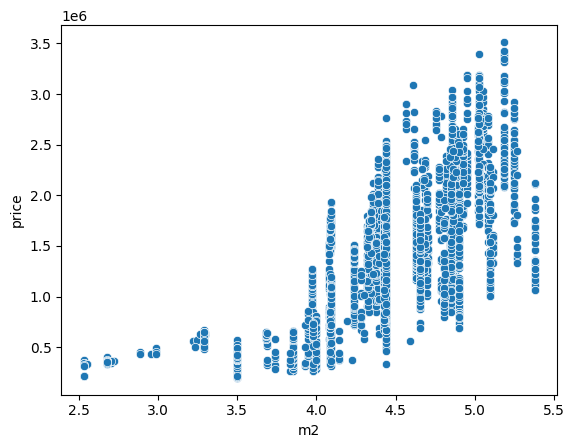

In [174]:
# creating scatter plot
import seaborn as sns
sns.scatterplot(data=df1, x='m2', y='price');

**Comment**: Linear regression needs the relationship between the independent and dependent variables to be linear.

The higher the price, the larger the square meter. However, there is still a lot of variation in price. In addition, when it goes from +/- 175 m2, the price drops again. It cannot be said that there is a strong linear correlation between the variables.

**Homoscedasticity**

Linear regression needs the residuals to be homocedastic. If the residuals are homocedastic, it means they are equal across the regression line. Homoscedasticity can be checked with the Goldfeld Quandt's hypothesis test. This test can be performed by importing the `statsmodels.stats.api.het_goldfeldtquandt()` function. In this test, the null hypothesis is that there is homoscedasticity. P-values greater than 0.05 indicate that the null hypothesis cannot be rejected.

In [175]:
# importing and applying function
from statsmodels.stats.api import het_goldfeldquandt
stat, p_valor, _ = het_goldfeldquandt(res, X)
p_valor

3.4232536086860795e-22

**Comment**: The p_value is less than 0.05, so it would not be advisable to continue with the model.

**Normality of Residues**

Linear regression assumes there is normal distribution in the residuals. The normality of the residuals can be checked using the Shapiro-Wilk hypothesis test. In this case, the null hypothesis is that the sample follows a normal distribution. P-values greater than 0.05 indicate that the null hypothesis cannot be rejected. This test can be performed by importing the `scipy.stats.shapiro()` function.

In [176]:
# importando e aplicando função
from scipy.stats import shapiro
stat, p_valor = shapiro(res)
p_valor

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


7.838917594454599e-26

**Comment**: The p_value is less than 0.05, so it would not be advisable to continue with the model.

**Autocorrelation of Residuals**

Linear regression requires that there is little or no autocorrelation in the residuals. The Durbin Watson hypothesis test checks if there is autocorrelation among the residuals. It can be imported from `statsmodels` with the `statsmodels.stats.stattolls.durbin_watons()` syntax. Test results between 1.5 and 2.5 indicate that there is no autocorrelation, values outside this range indicate that there is autocorrelation.

In [177]:
# importando e aplicando função
from statsmodels.stats.stattools import durbin_watson
durbin_watson(res)

0.7433704819691179

**Comment**: The test result is 0.7433, so we can say that there is an autocorrelation in the residuals. This means that linear regression could not be applied.

# Multiple Linear Regression

## Activity 5: Create a multiple linear regression model.

In [178]:
# merging services variables in one
df['no_of_services'] = df['no_hospitals_nearby'] + \
                      df['no_stores_nearby'] + \
                      df['no_public_offices_nearby'] + \
                      df['no_schools1_nearby'] + \
                      df['no_schools2_nearby'] + \
                      df['no_highschools_nearby'] + \
                      df['no_universities_nearby']

# deleting original variables from the DataFrame
df.drop(['no_hospitals_nearby','no_stores_nearby',
         'no_public_offices_nearby','no_schools1_nearby',
         'no_schools2_nearby','no_highschools_nearby',
         'no_universities_nearby'],
        axis=1, inplace=True)

In [179]:
# merging convinience variables in one
df['no_convenience'] = df['no_malls_nearby'] + df['no_parking_nearby']

# excluding variables from DataFrame
df.drop(['no_malls_nearby','no_parking_nearby'],
        axis=1, inplace=True)

df.head()

,price,year_construction,year_sale,m2,floor,type_heat,time_to_bus,time_to_subway,no_lifts,no_of_services,no_convenience
0,849552,2006,2007,75.623042,3,individual,5min~10min,10min~15min,0,13,1
1,307962,1985,2007,54.534061,8,individual,0~5min,5min~10min,2,12,2
2,292032,1985,2007,54.534061,6,individual,0~5min,5min~10min,2,12,2
3,2283180,2006,2007,191.008568,8,individual,0~5min,0-5min,11,9,1
4,1327428,1993,2007,163.602183,3,individual,0~5min,15min~20min,20,25,1


In [180]:
# applying One Hot Encoding to variable to variable type_heat
df_aux = pd.get_dummies(df['type_heat'], prefix='type_heat')
df = pd.concat([df, df_aux], axis=1)
df.drop(['type_heat', 'type_heat_central'], axis=1, inplace=True)

In [181]:
# applying One Hot Encoding to variable time_to_bus
df_aux = pd.get_dummies(df['time_to_bus'], prefix='time_to_bus')
df = pd.concat([df, df_aux], axis=1)
df.drop(['time_to_bus', 'time_to_bus_10min~15min'], axis=1, inplace=True)

In [182]:
# applying One Hot Encoding to variable time_to_subway
df_aux = pd.get_dummies(df['time_to_subway'], prefix='time_to_subway')
df = pd.concat([df, df_aux], axis=1)
df.drop(['time_to_subway', 'time_to_subway_no_bus_stop_nearby'], axis=1, inplace=True)
df.head()

,price,year_construction,year_sale,m2,floor,no_lifts,no_of_services,no_convenience,type_heat_individual,time_to_bus_0~5min,time_to_bus_5min~10min,time_to_subway_0-5min,time_to_subway_10min~15min,time_to_subway_15min~20min,time_to_subway_5min~10min
0,849552,2006,2007,75.623042,3,0,13,1,1,0,1,0,1,0,0
1,307962,1985,2007,54.534061,8,2,12,2,1,1,0,0,0,0,1
2,292032,1985,2007,54.534061,6,2,12,2,1,1,0,0,0,0,1
3,2283180,2006,2007,191.008568,8,11,9,1,1,1,0,1,0,0,0
4,1327428,1993,2007,163.602183,3,20,25,1,1,1,0,0,0,1,0


In [183]:
# separating data in X and y
X2 = df.drop('price', axis=1)
y2 = df['price']

In [184]:
# importing StandardScaler to standardize data
from sklearn.preprocessing import StandardScaler

# instantiating function
scaler = StandardScaler()

# creating a copy of the values
X_scaled = X2.copy()

# applying standardization
X_scaled[X_scaled.columns] = scaler.fit_transform(X_scaled)

X_scaled.head()

,year_construction,year_sale,m2,floor,no_lifts,no_of_services,no_convenience,type_heat_individual,time_to_bus_0~5min,time_to_bus_5min~10min,time_to_subway_0-5min,time_to_subway_10min~15min,time_to_subway_15min~20min,time_to_subway_5min~10min
0,0.344181,-1.959067,-0.370182,-1.195839,-1.427953,-0.723875,-0.772684,0.231641,-1.806284,1.854545,-0.938566,2.511759,-0.439310,-0.488514
1,-2.039194,-1.959067,-0.963752,-0.533420,-1.171726,-0.896304,0.524518,0.231641,0.553623,-0.539216,-0.938566,-0.398127,-0.439310,2.047024
2,-2.039194,-1.959067,-0.963752,-0.798388,-1.171726,-0.896304,0.524518,0.231641,0.553623,-0.539216,-0.938566,-0.398127,-0.439310,2.047024
3,0.344181,-1.959067,2.877458,-0.533420,-0.018703,-1.413592,-0.772684,0.231641,0.553623,-0.539216,1.065455,-0.398127,-0.439310,-0.488514
4,-1.131242,-1.959067,2.106078,-1.195839,1.134320,1.345276,-0.772684,0.231641,0.553623,-0.539216,-0.938566,-0.398127,2.276298,-0.488514


In [185]:
# adding the constant to the multiple linear regression model
X2 = sm.add_constant(X_scaled)

# adjusting the model
model2 = sm.OLS(y2, X2).fit()

# displaying the results
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     2000.
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:22:25   Log-Likelihood:                -81941.
No. Observations:                5891   AIC:                         1.639e+05
Df Residuals:                    5876   BIC:                         1.640e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [186]:
model2.params

const                         1.327309e+06
year_construction             1.317201e+05
year_sale                     2.075267e+05
m2                            4.018310e+05
floor                         6.776331e+04
no_lifts                      7.917780e+04
no_of_services               -8.736460e+04
no_convenience                5.713787e+03
type_heat_individual          6.703751e+04
time_to_bus_0~5min            2.700116e+05
time_to_bus_5min~10min        2.577272e+05
time_to_subway_0-5min         7.402452e+04
time_to_subway_10min~15min    4.994503e+04
time_to_subway_15min~20min   -2.401399e+04
time_to_subway_5min~10min     5.962786e+04
dtype: float64

**Comment**: The estimated model was $y = 1.32 - 1.31$ `year_construction` $- 2.07$ `year_sale` $- 4.01$ `m2` $- 6.77$ `floor` ...

## Activity 6: Predict the price of an apartment with the following characteristics:
year_construction = 2000

year_sale = 2003

m2 = 83

floor = 2

no_lifts = 1

no_of_services = 4

no_convenience = 2

type_heat_individual = 1

time_to_bus_0~5min = 0

time_to_bus_5min~10min = 1

time_to_subway_0-5min = 1

time_to_subway_10min~15min = 0

time_to_subway_15min~20min = 0

time_to_subway_5min~10min = 0

In [187]:
# creating dataframe with prevision data
list = {'year_construction' : 2000, 'year_sale': 2003, 'm2':83, 'floor': 2,
         'no_lifts': 1, 'no_of_services': 4 , 'no_convenience': 2 ,
         'type_heat_individual': 1 , 'time_to_bus_0~5min': 0 ,
         'time_to_bus_5min~10min': 1 , 'time_to_subway_0-5min': 1 ,
         'time_to_subway_10min~15min': 0 , 'time_to_subway_15min~20min': 0 ,
         'time_to_subway_5min~10min': 0 }
df_prev = pd.DataFrame(list, index=[1])
df_prev.head()

,year_construction,year_sale,m2,floor,no_lifts,no_of_services,no_convenience,type_heat_individual,time_to_bus_0~5min,time_to_bus_5min~10min,time_to_subway_0-5min,time_to_subway_10min~15min,time_to_subway_15min~20min,time_to_subway_5min~10min
1,2000,2003,83,2,1,4,2,1,0,1,1,0,0,0


In [188]:
# applying the scaler.transform to obtain the values of interest, since the dataframe had been standardized
df_prev[df_prev.columns] = scaler.transform(df_prev)
df_prev

,year_construction,year_sale,m2,floor,no_lifts,no_of_services,no_convenience,type_heat_individual,time_to_bus_0~5min,time_to_bus_5min~10min,time_to_subway_0-5min,time_to_subway_10min~15min,time_to_subway_15min~20min,time_to_subway_5min~10min
1,-0.336783,-3.335889,-0.16255,-1.328322,-1.299839,-2.275738,0.524518,0.231641,-1.806284,1.854545,1.065455,-0.398127,-0.43931,-0.488514


In [189]:
# applying model
model2.predict([1, -0.336783, -3.335889, -0.16255, -1.328322, -1.299839, -2.275738, 0.524518, 0.231641, -1.806284, 1.854545, 1.065455, -0.398127, -0.43931, -0.488514])

array([580413.54359847])

###Resposta
Um apartamento com as caracteristicas mencionadas custa, segundo o modelo, 580.413,54.

## Activity 7: Check model assumptions.

In [190]:
# predicting values for X
y_pred2 = model2.predict(X2)

# calculating the residuals
res2 = y2 - y_pred2

**Homoscedasticity of Residuals**

In [191]:
# applying function
stat, p_valor2, _ = het_goldfeldquandt(res2, X2)
p_valor2

1.1901268230241252e-57

**Comment**: The p_value is less than 0.05, so the model cannot be continued. Compared with Model 1, Model 2 is better.

**Normality of Residuals**

In [192]:
# applying function
stat, p_valor2 = shapiro(res2)
p_valor2

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


1.2338423639140534e-31

**Comment**: The p_value is less than 0.05, so the model cannot be continued. Compared with Model 1, Model 2 is better.

**Autocorrelation of Residuals**

In [193]:
# applying function
durbin_watson(res2)

0.9769517207167945

**Comment**: The test result is 0.9769, so we can say that there is an autocorrelation of the residuals. This means that linear regression could not be applied. However, the result is greater than that of model 1, so in this regard, model 2 is better.

**Multicollinearity**

In [194]:
# importing function
from statsmodels.stats.outliers_influence import variance_inflation_factor
# finding VIF for each variable
VIF = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
# displaying the VIF for each variable
for indice, vif in enumerate(VIF):
  print(f'{X2.columns[indice]}: {vif}')

const: 1.000000000000002
year_construction: 2.8769439253776743
year_sale: 1.2074901489750312
m2: 1.5790474186140362
floor: 1.1770457683797
no_lifts: 2.9233278102510476
no_of_services: 2.448935745707548
no_convenience: 1.6080686093925656
type_heat_individual: 4.381063755907036
time_to_bus_0~5min: 24.535240105582353
time_to_bus_5min~10min: 23.55155044796696
time_to_subway_0-5min: 8.837772704107909
time_to_subway_10min~15min: 7.932944735408352
time_to_subway_15min~20min: 8.04640147760748
time_to_subway_5min~10min: 6.515412922960057


**Comment**: If VIF > 10, there are indications that there may be multicollinearity, if VIF > 100, there is certainly multicollinearity between the variables. According to the test, there are two values greater than 10: time_to_bus_0~5min: 24.535240105582353 and time_to_bus_5min~10min: 23.55155044796696. They could be removed.

In [195]:
# deleting variables from the DataFrame
df.drop(['time_to_bus_0~5min','time_to_bus_5min~10min'],
        axis=1, inplace=True)

df.head()

,price,year_construction,year_sale,m2,floor,no_lifts,no_of_services,no_convenience,type_heat_individual,time_to_subway_0-5min,time_to_subway_10min~15min,time_to_subway_15min~20min,time_to_subway_5min~10min
0,849552,2006,2007,75.623042,3,0,13,1,1,0,1,0,0
1,307962,1985,2007,54.534061,8,2,12,2,1,0,0,0,1
2,292032,1985,2007,54.534061,6,2,12,2,1,0,0,0,1
3,2283180,2006,2007,191.008568,8,11,9,1,1,1,0,0,0
4,1327428,1993,2007,163.602183,3,20,25,1,1,0,0,1,0


In [200]:
# separating the data in X and y to test without the mentioned variables
X2 = df.drop('price', axis=1)
y2 = df['price']

In [201]:
# criando uma cópia dos valores
X2_scaled = X2.copy()

# aplicando a padronização
X2_scaled[X2_scaled.columns] = scaler.fit_transform(X2_scaled)

X2_scaled.head()

,year_construction,year_sale,m2,floor,no_lifts,no_of_services,no_convenience,type_heat_individual,time_to_subway_0-5min,time_to_subway_10min~15min,time_to_subway_15min~20min,time_to_subway_5min~10min
0,0.344181,-1.959067,-0.370182,-1.195839,-1.427953,-0.723875,-0.772684,0.231641,-0.938566,2.511759,-0.439310,-0.488514
1,-2.039194,-1.959067,-0.963752,-0.533420,-1.171726,-0.896304,0.524518,0.231641,-0.938566,-0.398127,-0.439310,2.047024
2,-2.039194,-1.959067,-0.963752,-0.798388,-1.171726,-0.896304,0.524518,0.231641,-0.938566,-0.398127,-0.439310,2.047024
3,0.344181,-1.959067,2.877458,-0.533420,-0.018703,-1.413592,-0.772684,0.231641,1.065455,-0.398127,-0.439310,-0.488514
4,-1.131242,-1.959067,2.106078,-1.195839,1.134320,1.345276,-0.772684,0.231641,-0.938566,-0.398127,2.276298,-0.488514


In [202]:
# adicionando a constante ao modelo de regressão linear múltipla
X2 = sm.add_constant(X2_scaled)

# ajustando o modelo
model2 = sm.OLS(y2, X2).fit()

# exibindo os resultados
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     2220.
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:26:53   Log-Likelihood:                -82062.
No. Observations:                5891   AIC:                         1.642e+05
Df Residuals:                    5878   BIC:                         1.642e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [203]:
model2.params

const                         1.327309e+06
year_construction             1.253299e+05
year_sale                     2.059728e+05
m2                            4.164843e+05
floor                         6.445665e+04
no_lifts                      7.857448e+04
no_of_services               -6.193977e+04
no_convenience                1.528239e+04
type_heat_individual          6.000647e+04
time_to_subway_0-5min         4.997848e+04
time_to_subway_10min~15min    2.300868e+04
time_to_subway_15min~20min   -5.439073e+04
time_to_subway_5min~10min     3.093608e+04
dtype: float64

In [204]:
# prevendo valores para X
y_pred2 = model2.predict(X2)

# calculando os resíduos
res2 = y2 - y_pred2

In [205]:
# homocedasticidade
stat, p_valor2, _ = het_goldfeldquandt(res2, X2)
p_valor2

3.565018951319237e-51

In [206]:
# normalidade
stat, p_valor2 = shapiro(res2)
p_valor2

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


4.5508808288023917e-32

In [207]:
# autocorrelação
durbin_watson(res2)

1.0055936994647237

In [208]:
# encontrando VIF para cada variável
VIF = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

# exibindo o VIF para cada variável
for indice, vif in enumerate(VIF):
  print(f'{X2.columns[indice]}: {vif}')

const: 1.000000000000002
year_construction: 2.858637564689429
year_sale: 1.2049981675286352
m2: 1.4481460137001159
floor: 1.1610955505138412
no_lifts: 2.9216349077836385
no_of_services: 2.0322393030667913
no_convenience: 1.57263691213609
type_heat_individual: 3.784988522975382
time_to_subway_0-5min: 8.375740433079844
time_to_subway_10min~15min: 5.799859764131141
time_to_subway_15min~20min: 7.101905829479591
time_to_subway_5min~10min: 6.076632582037727


**Comment**: When removing the variables mentioned above, the adjusted R drops slightly (from 0.82 to 0.81), and the values of the other tests improve. However, even removing the variables, model 2 does not meet all the assumptions for linear regression.

## Activity 8: Evaluate and compare both models and decide which one is better.

In [213]:
# r squared and adjusted r squared
print(f"Model: R2 = {model.rsquared}, R2 Adjusted = {model.rsquared_adj}")
print(f"Model2: R2 = {model2.rsquared}, R2 Adjusted = {model2.rsquared_adj}")

Model: R2 = 0.49850377056162654, R2 Adjusted = 0.49841861243130925
Model2: R2 = 0.8192382797182711, R2 Adjusted = 0.8188692527289243


In [214]:
# MSE
# importing, applying the function and printing results
from statsmodels.tools.eval_measures import mse
print(f"MSE Model: {mse(y, res)}")
print(f"MSE Model2: {mse(y2, res2)}")

MSE Model: 1964820940296.0916
MSE Model2: 2095476717082.052


In [215]:
# RMSE
# importing, applying the function and printing results
from statsmodels.tools.eval_measures import rmse
print(f"RMSE Model: {rmse(y, res)}")
print(f"RMSE Model2: {rmse(y2, res2)}")

RMSE Model: 1401720.7069513141
RMSE Model2: 1447576.1524293125


In [216]:
# MAE
# importing, applying the function and printing results
from statsmodels.tools.eval_measures import meanabs

print(f'MAE Model: {meanabs(y, res)}')
print(f'MAE Model2: {meanabs(y2, res2)}')

MAE Model: 1338568.4516168616
MAE Model2: 1327346.3099835846


###Answer
It is observed that the R2 and adjusted R2 values of model 2 are much better than the values of model 1. Considering that the smaller the values of MSE, RSME and MAE, the better the model will be, it can be observed that the model 1 has a small advantage in two of the metrics.

Taking into account that model 2 has a much higher adjusted R, it can be stated that model 2 could be the best model to make predictions in this dataset. It would be possible to try to eliminate more variables, for example, time_to_bus_0~5min, since it has a higher VIF than the others.

However, none of the models satisfied any of the assumptions for the application of linear regression, which leads us to conclude that **none of the models should be applied**.